# Ridge Histogram Plots
from unidentified sources

### Import Libraries

In [67]:
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
from IPython.display import display
from tqdm import tqdm_notebook
import tqdm
import seaborn as sns
sns.set(font_scale=1.3, rc={'axes.facecolor':'white', 'figure.facecolor':'white' , 'axes.grid':True} , style="whitegrid")
from IPython.display import Markdown as md
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [118]:
d_name = 'mode' 
m_name = 'GB'
train_df = pd.read_csv(f'temp_res_comp/train_prob/{d_name}_{m_name}.csv' , index_col='name')
u_df = pd.read_csv(f'temp_res_comp/unid_prob/{m_name}_{d_name}.csv' , index_col='name')
classes = ['AGN' ,'YSO' ,'STAR' ,'HMXB' ,'LMXB' ,'ULX' ,'CV' ,'PULSAR']

In [119]:
u_df

,class,prob,prob_AGN,prob_CV,prob_HMXB,prob_LMXB,prob_PULSAR,prob_STAR,prob_ULX,prob_YSO
name,,,,,,,,,,
2CXO J004829.5-732959,HMXB,0.422519,0.190206,0.049038,0.422519,0.013625,0.039691,0.195743,0.065849,0.023329
2CXO J005449.0-725128,HMXB,0.398358,0.229883,0.048965,0.398358,0.011276,0.039403,0.180181,0.072626,0.019307
2CXO J010049.1-731526,HMXB,0.400750,0.227669,0.033890,0.400750,0.011344,0.052597,0.181264,0.073062,0.019423
2CXO J010049.8-731045,HMXB,0.400750,0.227669,0.033890,0.400750,0.011344,0.052597,0.181264,0.073062,0.019423
2CXO J010647.7-730940,STAR,0.467281,0.103932,0.032469,0.309010,0.016796,0.035002,0.467281,0.016062,0.019447
...,...,...,...,...,...,...,...,...,...,...
2CXO J220433.1-495916,HMXB,0.547978,0.225725,0.096775,0.547978,0.008345,0.015526,0.065322,0.033569,0.006762
2CXO J220508.3-495935,HMXB,0.564977,0.173734,0.135461,0.564977,0.014630,0.018344,0.067348,0.018535,0.006971
2CXO J220544.0-495505,HMXB,0.551490,0.170874,0.135806,0.551490,0.011791,0.009547,0.093892,0.017877,0.008723


### ROC-AUC curve

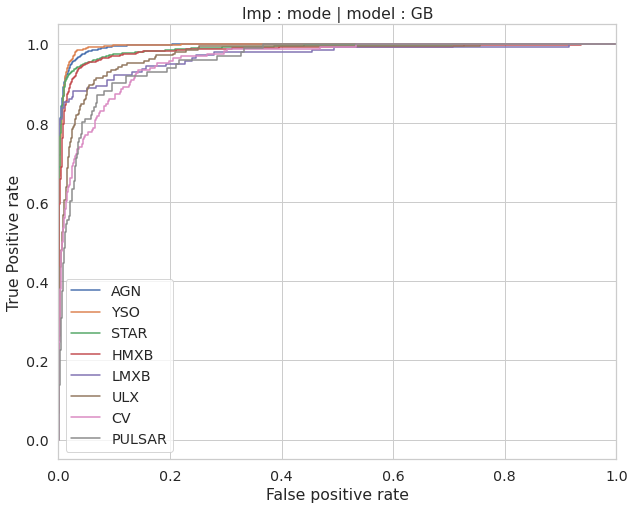

In [120]:
from sklearn.metrics import roc_curve
fig , ax = plt.subplots(nrows=1 , ncols=1 , figsize=(10,8))
fpr , tpr , th = {} ,{} ,{}
sns.set_palette('tab10')
for cl in classes:
#cl = 'ULX'
    temp_res = train_df.copy()
    temp_res['true_class']  = [1 if el==cl else 0 for el in temp_res['true_class']]
    fpr , tpr , th = roc_curve(temp_res['true_class'] , temp_res[f'prob_{cl}'] , )
    ax.plot(fpr,tpr , label=cl)
    ax.set_xlim(0,1)
plt.ylabel('True Positive rate')
plt.xlabel('False positive rate')
plt.title(f'Imp : {d_name} | model : {m_name}')
plt.legend()
plt.savefig(f'temp_res_comp/roc-auc/{d_name}_{m_name}.png')
plt.show()

### Confusion Matrix

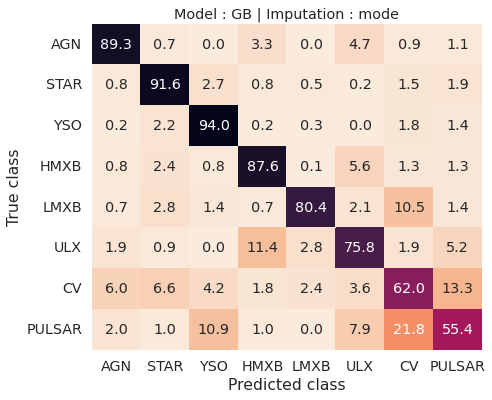

In [121]:
from utilities import plot_cf
plot_dict_def = {
    'title' : False , 
    'font_scale' : 1.2 ,
    'cbar' : False ,
    'plot_num' : 0,
}
fig , ax = plt.subplots(nrows=1 , ncols=1 , figsize=(7,6))
plot_cf([train_df] , plot_dict=plot_dict_def , confidance=0. , ax=ax)
plt.title(f'Model : {m_name} | Imputation : {d_name}')
plt.savefig(f'temp_res_comp/cf/{m_name}_{d_name}.png')
plt.show()

### Scores

In [122]:
from utilities import get_score
score = get_score([train_df])
score

{'classes': array(['AGN', 'CV', 'HMXB', 'LMXB', 'PULSAR', 'STAR', 'ULX', 'YSO'],
       dtype=object),
 'num_src':         pred_class
 STAR          2633
 AGN           2184
 YSO           1182
 HMXB           786
 ULX            338
 CV             239
 PULSAR         196
 LMXB           145,
 'balanced_accuracy': 0.7951883707695815,
 'accuracy': 0.8908217577567181,
 'precision': 0.913771035066534,
 'recall': 0.8908217577567181,
 'f1': 0.8994786076658737,
 'class_scores':         recall_score  precision_score  f1_score
 class                                          
 AGN         0.892693         0.978938  0.933828
 CV          0.620482         0.430962  0.508642
 HMXB        0.875668         0.833333  0.853977
 LMXB        0.804196         0.793103  0.798611
 PULSAR      0.554455         0.285714  0.377104
 STAR        0.915771         0.970376  0.942283
 ULX         0.758294         0.473373  0.582878
 YSO         0.939948         0.913706  0.926641}

### Train Data pred Histogram

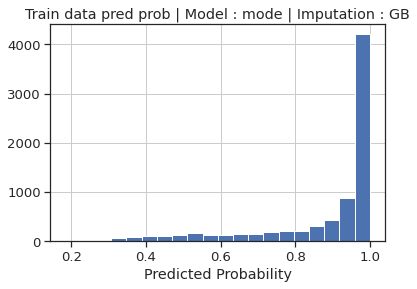

In [123]:
plt.hist(train_df['pred_prob'] , bins=20)
plt.title(f'Train data pred prob | Model : {d_name} | Imputation : {m_name}')
plt.xlabel('Predicted Probability')
plt.savefig(f'temp_res_comp/train_prob_dist/{d_name}_{m_name}.jpg')
plt.show()

### Unidentified sources

In [124]:
mode = u_df['prob'].mode()
mode

0    0.637279
dtype: float64

In [125]:
u_df['prob'].describe()

count    39893.000000
mean         0.691873
std          0.235878
min          0.185302
25%          0.482238
50%          0.706252
75%          0.927575
max          1.000000
Name: prob, dtype: float64

In [128]:
prob_list = np.asarray(u_df['prob'])
import statistics as stat 
stat.mode(prob_list)

0.6372794951992046

In [131]:
u_df['prob'].value_counts()

0.637279    22
0.503446    16
0.416800    12
0.959214     7
0.517648     5
            ..
0.405386     1
0.508430     1
0.610145     1
0.716099     1
0.855027     1
Name: prob, Length: 39703, dtype: int64

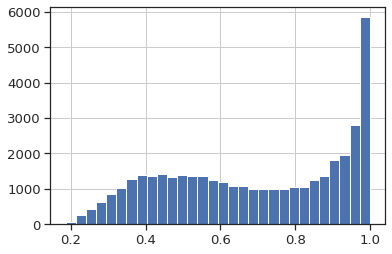

In [135]:
x ,y ,z = plt.hist(prob_list , bins=30)
plt.show()

In [136]:
y[np.argmax(x)]

0.9728432485554943

In [100]:
np.savetxt('tmep.csv' , prob_list , )

In [81]:
u_df_num = u_df['class'].value_counts().to_frame()
u_df_num = pd.concat([
                u_df['class'].value_counts() ,
                u_df[u_df['prob']>mode]['class'].value_counts(),
                u_df[u_df['prob']>0.6]['class'].value_counts(),
                u_df[u_df['prob']>0.7]['class'].value_counts(),
                u_df[u_df['prob']>0.8]['class'].value_counts(),
                u_df[u_df['prob']>0.9]['class'].value_counts(),
                u_df[u_df['prob']>0.98]['class'].value_counts(),
                 ] , axis=1)
u_df_num.columns = ['Argmax' , f"Most probable Prob {mode}" ,'0.6' ,'0.7' ,'0.8' ,'0.9' ,'0.98']
u_df_num.index.name = 'class'
#u_df_num.to_csv(f'temp_res_comp/unid_num/{d_name}_{m_name}.csv')
print(u_df_num.to_markdown())

ValueError: Can only compare identically-labeled Series objects

In [ ]:
from numpy.random import normal
from ridgeplot import ridgeplot
cl = classes[::-1]
sample = [u_df[u_df['class']==c]['prob'] for c in cl]

In [ ]:
fig = ridgeplot(
    samples=sample,
    kde_points=np.linspace(0, 1, 500),
    colorscale="inferno",
    colormode="index",
    coloralpha=0.6,
    labels=cl,
    spacing = 3 / 8,
    xpad=0
)
fig.update_layout(
    title=f"Unidentified sources | Imputation : {d_name} | classifier : {m_name}",
    height=550,
    width=600,
    plot_bgcolor="rgba(255, 255, 255, 0.0)",
    xaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    yaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    xaxis_title="Predicted Probability",
    yaxis_title="Predicted Probability Density",
)

#fig.save('temp.png')
#fig.write_image(f'temp_res_comp/unid_prob_dist/{m_name}_{d_name}.jpg')
fig.show()